In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

# Load Data

In [2]:
train=pd.read_csv("data/jetrail/Train_SU63ISt.csv") 
test=pd.read_csv("data/jetrail/Test_0qrQsBZ.csv")
train_original=train.copy() 
test_original=test.copy()

In [3]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [4]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [5]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [7]:
# train['Datetime'] = pd.to_datetime(train['Datetime']).apply(lambda x: x.date())
# train['Month'] = train['Datetime'].apply(lambda x:x.month)
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [8]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']
train.tail(),train.head()

(          ID            Datetime  Count  year  month  day  Hour  day of week
 18283  18283 2014-09-25 19:00:00    868  2014      9   25    19            3
 18284  18284 2014-09-25 20:00:00    732  2014      9   25    20            3
 18285  18285 2014-09-25 21:00:00    702  2014      9   25    21            3
 18286  18286 2014-09-25 22:00:00    580  2014      9   25    22            3
 18287  18287 2014-09-25 23:00:00    534  2014      9   25    23            3,
    ID            Datetime  Count  year  month  day  Hour  day of week
 0   0 2012-08-25 00:00:00      8  2012      8   25     0            5
 1   1 2012-08-25 01:00:00      2  2012      8   25     1            5
 2   2 2012-08-25 02:00:00      6  2012      8   25     2            5
 3   3 2012-08-25 03:00:00      2  2012      8   25     3            5
 4   4 2012-08-25 04:00:00      2  2012      8   25     4            5)

In [11]:
train['weekend'] = np.where((train['day of week'] == 5) | (train['day of week'] == 6),'1',0)

# Exploratory Analysis

Lets recall the hypothesis that we made earlier:

* Traffic will increase as the years pass by
* Traffic will be high from May to October
* Traffic on weekdays will be more
* Traffic during the peak hours will be high

## Traffic will increase as the years pass by

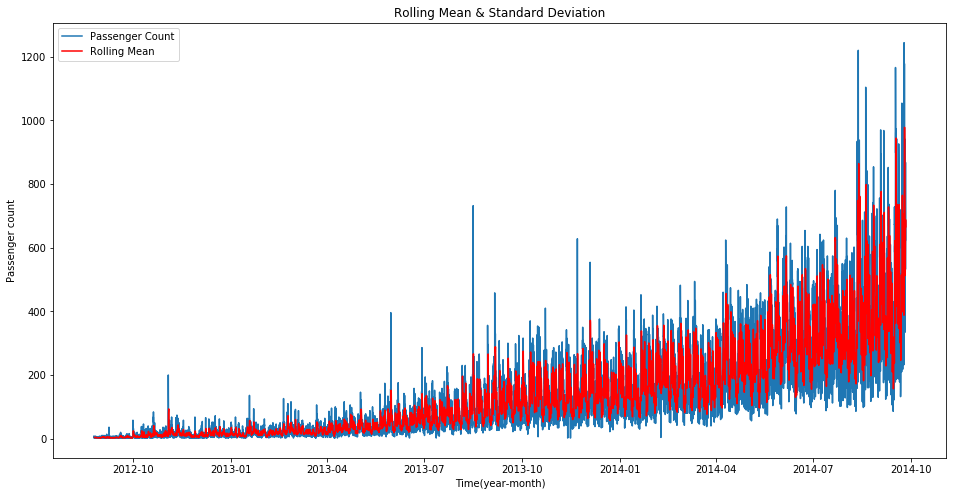

In [18]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 

rolmean = ts.rolling(window=12).mean()
rolstd = ts.rolling(window=12).std()

mean = plt.plot(rolmean, color='red', label='Rolling Mean',)
# std = plt.plot(rolstd, color='black', label = 'Rolling Std')

plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

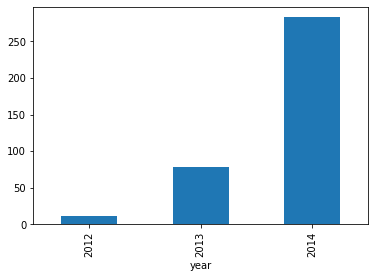

In [20]:
# traffic will increase as the years pass by
train.groupby('year')['Count'].mean().plot.bar()

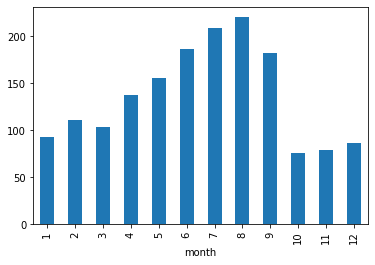

In [21]:
#  increase in traffic from May to October.
train.groupby('month')['Count'].mean().plot.bar()

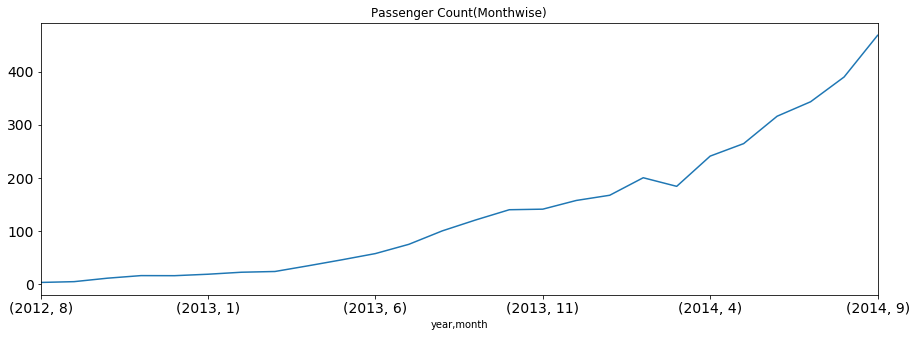

In [25]:
temp=train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

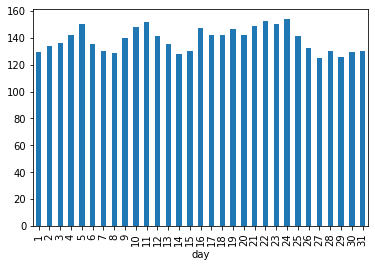

In [26]:
train.groupby('day')['Count'].mean().plot.bar()

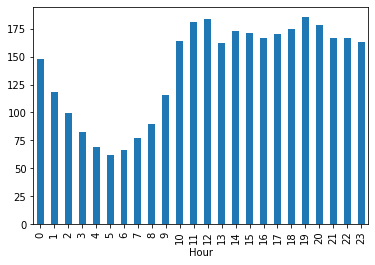

In [27]:
train.groupby('Hour')['Count'].mean().plot.bar()

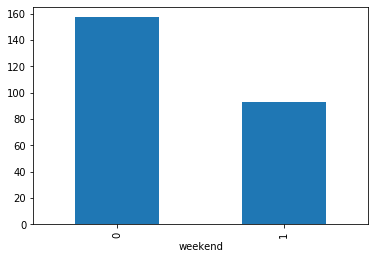

In [29]:
train.groupby('weekend')['Count'].mean().plot.bar()

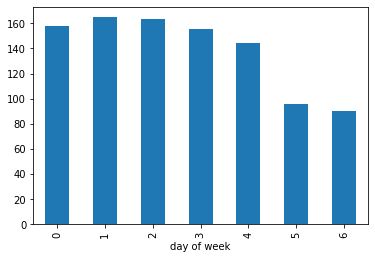

In [30]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [31]:
train=train.drop('ID',1)

In [32]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

C:\Users\I054497\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [34]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [36]:
daily.head()

,Count,year,month,day,Hour,day of week
Datetime,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0


In [37]:
hourly.head()

,Count,year,month,day,Hour,day of week
Datetime,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5
2012-08-25 01:00:00,2,2012,8,25,1,5
2012-08-25 02:00:00,6,2012,8,25,2,5
2012-08-25 03:00:00,2,2012,8,25,3,5
2012-08-25 04:00:00,2,2012,8,25,4,5


In [38]:
monthly.head()

,Count,year,month,day,Hour,day of week
Datetime,,,,,,
2012-08-31,2.952381,2012.0,8.0,28.0,11.5,3.000000
2012-09-30,4.444444,2012.0,9.0,15.5,11.5,3.166667
2012-10-31,10.986559,2012.0,10.0,16.0,11.5,2.806452
2012-11-30,15.827778,2012.0,11.0,15.5,11.5,3.033333
2012-12-31,15.680108,2012.0,12.0,16.0,11.5,3.064516


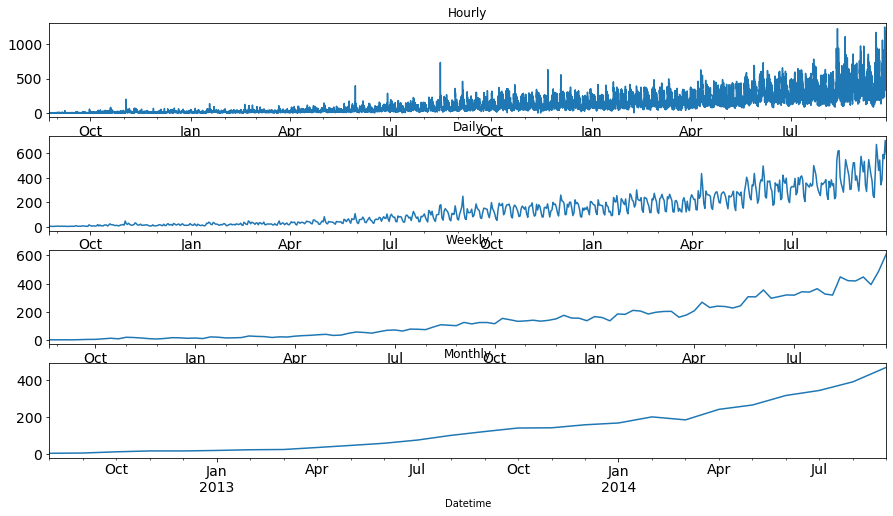

In [39]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()

In [41]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

C:\Users\I054497\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [47]:
Train=train.loc['2012-08-25':'2014-06-24'] 
valid=train.loc['2014-06-25':'2014-09-25']

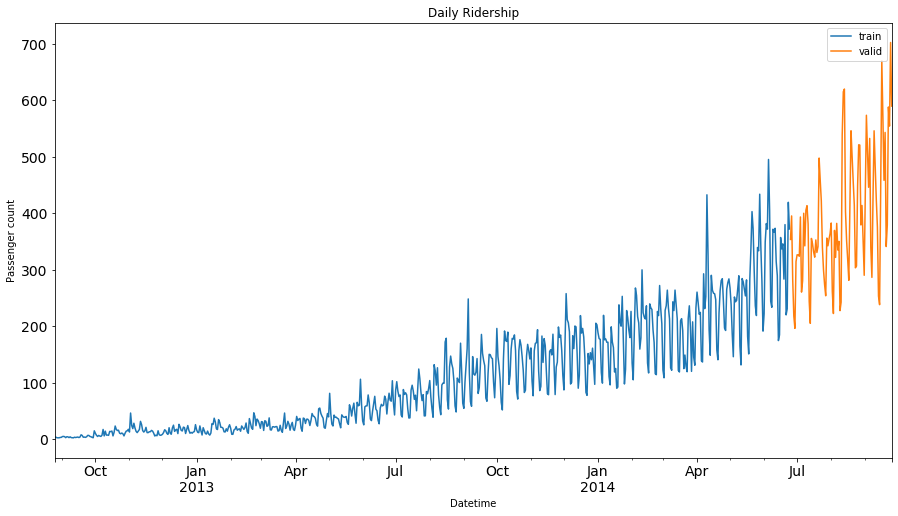

In [49]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

# Modelling

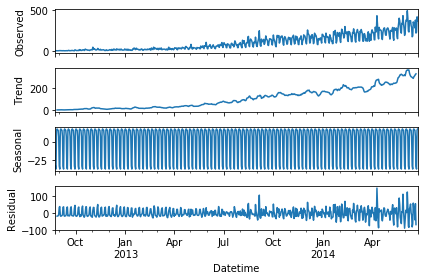

In [50]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

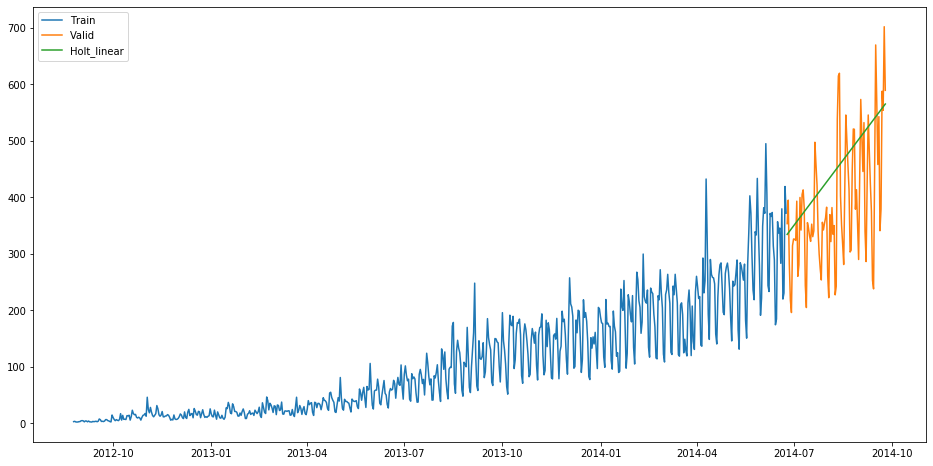

In [58]:
from statsmodels.tsa.api import Holt 
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [60]:
submission=pd.read_csv("data/jetrail/submission.csv")

In [62]:
predict=fit1.forecast(len(test))
test['prediction']=predict

In [63]:
test.head()

,ID,year,month,day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745


Remember this is the daily predictions. We have to convert these predictions to hourly basis. * To do so we will first calculate the ratio of passenger count for each hour of every day. * Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. * Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [67]:
# Calculating the hourly ratio of count 
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 


In [68]:
train_original.head()

,ID,Datetime,Count,year,month,day,Hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07


In [69]:
# Grouping the hourly ratio 
temp=train_original.groupby(['Hour'])['ratio'].sum()
temp.head()

Hour
0    0.044287
1    0.035343
2    0.029911
3    0.024714
4    0.020802
Name: ratio, dtype: float64

In [72]:
# Grouping the hourly ratio 
temp=train_original.groupby(['Hour'])['ratio'].sum() 

# Groupby to csv format 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('Hour.1',1) 

# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [73]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1) 
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')